In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.offline as pyo
import os

df = pd.read_csv(r"D:\Python\Data Analysis\gdp.csv", encoding = "utf-8")
df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [37]:
df.isna().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [38]:
df.shape

(11507, 4)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


In [40]:
df.describe()

,Year,Value
count,11507.000000,1.150700e+04
mean,1991.265230,1.005972e+12
std,15.886648,4.533056e+12
min,1960.000000,8.824448e+06
25%,1978.000000,2.056874e+09
50%,1993.000000,1.436880e+10
75%,2005.000000,1.796394e+11
max,2016.000000,7.904923e+13


C:\Users\Chary Mattela\AppData\Local\Temp\ipykernel_25088\1710684423.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Year', ylabel='Density'>

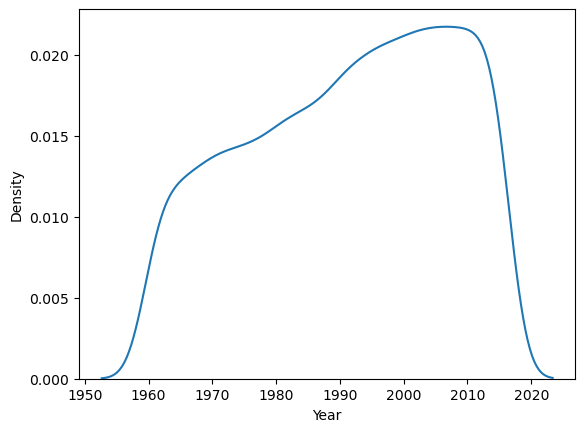

In [41]:
sns.distplot(df["Year"], kde = True, hist = False)

C:\Users\Chary Mattela\AppData\Local\Temp\ipykernel_25088\1655328631.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Value', ylabel='Density'>

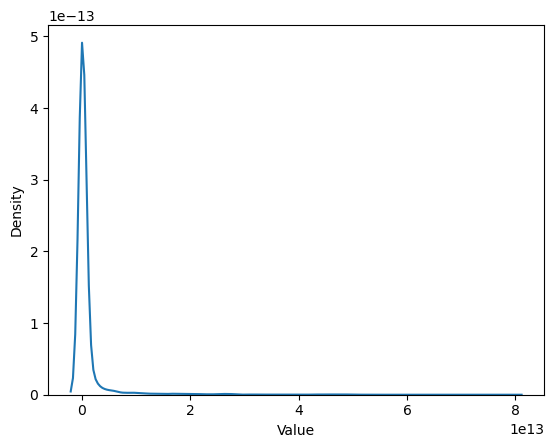

In [42]:
sns.distplot(df["Value"], kde = True, hist = False)

In [43]:
df["Country Name"].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

In [44]:
df.columns

Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')

In [45]:
df[df["Country Name"] == "India"]["Year"].max()

2016

In [46]:
df[df["Country Name"] == "India"]["Year"].min()

1960

Text(0.5, 1.0, "India's GDP Value from 1960 to 2016")

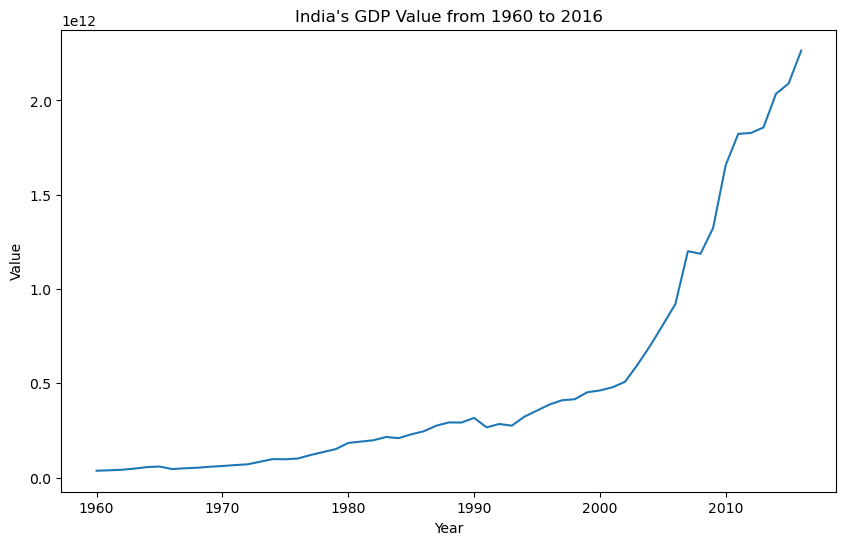

In [47]:
plt.figure(figsize = (10,6))
sns.lineplot(data = df[df["Country Name"] == "India"], x = "Year", y = "Value")
plt.title("India's GDP Value from 1960 to 2016")

In [48]:
df.head(2)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10


# Adding GDP_change column into DataFrame

In [49]:
lst = [0]
for country_name in (df["Country Name"].unique()):
    x = list(df[df["Country Name"] == country_name]["Value"])
    for i in range(1, len(x)):
        lst.append(round((x[i] - x[i-1])/x[i-1] *100, 2))
    lst.append(0)
del lst[-1]
df["GDP_change"] = lst
df

,Country Name,Country Code,Year,Value,GDP_change
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [50]:
df[df["Country Name"] == "India"]

,Country Name,Country Code,Year,Value,GDP_change
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
6079,India,IND,1965,5.876042e+10,5.44
6080,India,IND,1966,4.525364e+10,-22.99
6081,India,IND,1967,4.946617e+10,9.31
6082,India,IND,1968,5.237732e+10,5.89
6083,India,IND,1969,5.766833e+10,10.10


# Top 50 Countries with highest GDP 

In [51]:
df.groupby("Country Name").sum()["Value"].sort_values(ascending = False).head(50)

Country Name
World                                                   1.487469e+15
High income                                             1.111902e+15
OECD members                                            1.098365e+15
Post-demographic dividend                               1.055892e+15
Europe & Central Asia                                   4.919943e+14
North America                                           4.213468e+14
European Union                                          4.133394e+14
IDA & IBRD total                                        3.885541e+14
United States                                           3.860829e+14
Low & middle income                                     3.765982e+14
Middle income                                           3.701348e+14
IBRD only                                               3.605247e+14
East Asia & Pacific                                     3.572724e+14
Euro area                                               3.080244e+14
Upper middle income  

# GDP of India over all the years in the dataset

In [52]:
df.groupby("Country Name").sum()["Value"].sort_values(ascending = False).head(1000)["India"]

29033059613018.246

In [53]:
df[df["Country Name"] == "India"].sum()

Country Name    IndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaIndiaI...
Country Code    INDINDINDINDINDINDINDINDINDINDINDINDINDINDINDI...
Year                                                       113316
Value                                           29033059613018.25
GDP_change                                                 448.61
dtype: object

In [54]:
fig = ex.line(df[df["Country Name"] == "World"], x = "Year", y = "Value", title = "World GDP", range_y = [0,100000000000000])

In [55]:
ex.line(df[df["Country Name"] == "World"], x = "Year", y = "Value", title = "World GDP", range_y = [0,100000000000000])

In [56]:
pyo.plot(fig, filename = "World GDP.html")

'World GDP.html'

In [57]:
"""os.mkdir("GDP Individual")
for country in df["Country Name"].unique():
    fig = ex.line(df[df["Country Name"] == country], x = "Year", y = "Value", title = country + "GDP")
    pyo.plot(fig, filename = "GDP Individual/" + country + "GDP.html", auto_open = False)"""

'os.mkdir("GDP Individual")\nfor country in df["Country Name"].unique():\n    fig = ex.line(df[df["Country Name"] == country], x = "Year", y = "Value", title = country + "GDP")\n    pyo.plot(fig, filename = "GDP Individual/" + country + "GDP.html", auto_open = False)'

In [58]:
fig = ex.line(df, x="Year", y = "Value", title = "GDP of all Countries", color = "Country Name")
pyo.plot(fig, filename = "GDP of all Countries.html")

'GDP of all Countries.html'

In [60]:
india = df[df["Country Name"] == "India"]

In [62]:
china = df[df["Country Name"] == "China"]

In [64]:
df_pr = pd.concat([india, china], axis = 0)

In [65]:
df_pr

,Country Name,Country Code,Year,Value,GDP_change
6074,India,IND,1960,3.653593e+10,0.00
6075,India,IND,1961,3.870910e+10,5.95
6076,India,IND,1962,4.159907e+10,7.47
6077,India,IND,1963,4.777600e+10,14.85
6078,India,IND,1964,5.572687e+10,16.64
...,...,...,...,...,...
4098,China,CHN,2012,8.560547e+12,13.05
4099,China,CHN,2013,9.607224e+12,12.23
4100,China,CHN,2014,1.048237e+13,9.11
4101,China,CHN,2015,1.106467e+13,5.55


In [70]:
ex.line(df_pr, x = "Year", y = "Value", title = "GDP Comparison between India & China", color = "Country Name")

In [73]:
df["Country Code"].unique()

array(['ARB', 'CSS', 'CEB', 'EAR', 'EAS', 'EAP', 'TEA', 'EMU', 'ECS',
       'ECA', 'TEC', 'EUU', 'FCS', 'HPC', 'HIC', 'IBD', 'IBT', 'IDB',
       'IDX', 'IDA', 'LTE', 'LCN', 'LAC', 'TLA', 'LDC', 'LMY', 'LIC',
       'LMC', 'MEA', 'MNA', 'TMN', 'MIC', 'NAC', 'OED', 'OSS', 'PSS',
       'PST', 'PRE', 'SST', 'SAS', 'TSA', 'SSF', 'SSA', 'TSS', 'UMC',
       'WLD', 'AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN',
       'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'ETH',
       'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY',
       'HTI', 'HND',

In [114]:
def gdp_comparison(countries, save):
    lst = countries
    dfs = []
    for code in lst:
        dfs.append(df[df["Country Code"] == code])
    df_pr = pd.concat(dfs)
    fig = ex.line(df_pr, x = "Year", y = "GDP_change", title = "GDP Percentage Change of Countries - " + "|".join(lst), color = "Country Code")
    pyo.plot(fig, filename = "GDP Percentage Change of Countries", auto_open = bool(save) )

In [115]:
print(df["Country Code"].unique())
countries = list(input("Enter your choice of countries code from above keeping space between them: \n").split(" "))
save = input("Enter whether to view automatically b/w 'True' or 'False':")
gdp_comparison(countries, save)

['ARB' 'CSS' 'CEB' 'EAR' 'EAS' 'EAP' 'TEA' 'EMU' 'ECS' 'ECA' 'TEC' 'EUU'
 'FCS' 'HPC' 'HIC' 'IBD' 'IBT' 'IDB' 'IDX' 'IDA' 'LTE' 'LCN' 'LAC' 'TLA'
 'LDC' 'LMY' 'LIC' 'LMC' 'MEA' 'MNA' 'TMN' 'MIC' 'NAC' 'OED' 'OSS' 'PSS'
 'PST' 'PRE' 'SST' 'SAS' 'TSA' 'SSF' 'SSA' 'TSS' 'UMC' 'WLD' 'AFG' 'ALB'
 'DZA' 'ASM' 'AND' 'AGO' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS' 'AUT' 'AZE' 'BHS'
 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA'
 'BRA' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR' 'CAN' 'CYM' 'CAF' 'TCD'
 'CHI' 'CHL' 'CHN' 'COL' 'COM' 'COD' 'COG' 'CRI' 'CIV' 'HRV' 'CUB' 'CYP'
 'CZE' 'DNK' 'DJI' 'DMA' 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'ETH'
 'FRO' 'FJI' 'FIN' 'FRA' 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL'
 'GRD' 'GUM' 'GTM' 'GIN' 'GNB' 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND'
 'IDN' 'IRN' 'IRQ' 'IRL' 'IMN' 'ISR' 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN'
 'KIR' 'KOR' 'XKX' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN' 'LSO' 'LBR' 'LBY' 'LIE'
 'LTU' 'LUX' 'MAC' 'MKD' 'MDG' 'MWI' 'MYS' 'MDV' 'M

C:\Anaconda\Lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `GDP Percentage Change of Countries` didn't end with .html. Adding .html to the end of your file.



In [113]:
ex.line(df_pr, x = "Year", y = "Value", title = "GDP Comparison between India & China", color = "Country Name")

In [95]:
bool(True)

True

In [97]:
bool(True)

True

In [122]:
dfs = []
for country in df["Country Name"].unique():
    if len(df[df["Country Name"] == country]) == 57:
         dfs.append(df[df["Country Name"] == country])
df_pr = pd.concat(dfs)

In [123]:
df_pr

,Country Name,Country Code,Year,Value,GDP_change
49,Caribbean small states,CSS,1960,2.004785e+09,0.00
50,Caribbean small states,CSS,1961,2.169733e+09,8.23
51,Caribbean small states,CSS,1962,2.289495e+09,5.52
52,Caribbean small states,CSS,1963,2.431592e+09,6.21
53,Caribbean small states,CSS,1964,2.626896e+09,8.03
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [125]:
fig = ex.line(df_pr, x = "Year", y = "Value", title = "GDP Comparison between 1960 to 2016", color = "Country Name")
pyo.plot(fig, filename = "GDP Comparison between 1960 to 2016")

C:\Anaconda\Lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `GDP Comparison between 1960 to 2016` didn't end with .html. Adding .html to the end of your file.



'GDP Comparison between 1960 to 2016.html'

In [127]:
fig = ex.line(df_pr, x = "Year", y = "GDP_change", title = "GDP Comparison between 1960 to 2016", color = "Country Name")
pyo.plot(fig, filename = "GDP Percentage Comparison between 1960 to 2016")

C:\Anaconda\Lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `GDP Percentage Comparison between 1960 to 2016` didn't end with .html. Adding .html to the end of your file.



'GDP Percentage Comparison between 1960 to 2016.html'